## Setup

In [1]:
from __future__ import division, print_function, absolute_import

In [2]:
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
sns.set()

/usr/local/manual/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
from lsst.sims.catalogs.measures.instance import InstanceCatalog
import lsst.sims.catUtils.baseCatalogModels as bcm
from lsst.sims.catalogs.generation.db import CatalogDBObject, DBObject
from lsst.sims.catUtils.baseCatalogModels.GalaxyModels import GalaxyTileObj, GalaxyObj
from lsst.sims.utils import ObservationMetaData

/Users/rbiswas/src/LSST/sims_catalogs_generation/python/lsst/sims/catalogs/generation/db/dbConnection.py:438: UserWarning: Duplicate object type id 25 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')
/Users/rbiswas/src/LSST/sims_catalogs_generation/python/lsst/sims/catalogs/generation/db/dbConnection.py:438: UserWarning: Duplicate object type id 40 specified: 
Output object ids may not be unique.
This may not be a problem if you do not want globally unique id values
  'want globally unique id values')


## Catalogs

In [5]:
observerMetaData = ObservationMetaData(boundType='box',
                                  pointingRA=0.,
                                  pointingDec=0.,
                                  boundLength=0.1)

In [6]:
observerMetaData_1 = ObservationMetaData(boundType='box',
                                  pointingRA=0.,
                                  pointingDec=-4.,
                                  boundLength=0.1)

In [7]:
class galCopy(InstanceCatalog):
    column_outputs = ['galtileid', 'raJ2000', 'decJ2000', 'redshift', 'mass_stellar', 'absmag_r_total']#, 'a_d', 'b_d', 'pa_disk', 'mass_stellar', 'absmag_r_total']
    override_formats = {'raJ2000': '%8e', 'decJ2000': '%8e', 'a_d': '%8e', 'b_d': '%8e', 'pa_disk': '%8e', 
                        'mass_stellar': '%8e', 'absmag_r_total': '%8e'}

In [8]:
def galIds(tileID, galTileID):
    return galTileID - 100000000* tileID

In [9]:
galaxyTiled = GalaxyTileObj()

/usr/local/manual/anaconda/lib/python2.7/site-packages/sqlalchemy/dialects/mssql/base.py:1294: SAWarning: Did not recognize type 'geography' of column 'geopoint'
  return fn(*arg, **kw)


#### On Base Patch

In [10]:
constr='redshift < 0.4'
gBase = galCopy(galaxyTiled, obs_metadata=observerMetaData, constraint=constr)
gBase.write_catalog('gBase.csv')
gBase_df  = pd.read_csv('gBase.csv', delimiter=', ',index_col='#galtileid')
gBase_df.index.name = 'galtileid'
gBase_df.head()

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.


,raJ2000,decJ2000,redshift,mass_stellar,absmag_r_total
galtileid,,,,,
2203181224,0.000904,-0.001546,0.3832,0.024688,-16.87819
2206310941,0.000480,-0.001620,0.3887,0.012872,-16.08552
2206312900,0.000063,-0.001695,0.3907,0.001019,-15.68864
2201802989,0.000070,-0.001658,0.3863,0.058014,-17.75549
2206316339,0.001023,-0.000042,0.3882,0.004687,-15.93066


In [11]:
gBase_df['id'] = galIds(22, gBase_df.index.values)
gBase_df.set_index('id', inplace=True)
gBase_df.head()

,raJ2000,decJ2000,redshift,mass_stellar,absmag_r_total
id,,,,,
3181224,0.000904,-0.001546,0.3832,0.024688,-16.87819
6310941,0.000480,-0.001620,0.3887,0.012872,-16.08552
6312900,0.000063,-0.001695,0.3907,0.001019,-15.68864
1802989,0.000070,-0.001658,0.3863,0.058014,-17.75549
6316339,0.001023,-0.000042,0.3882,0.004687,-15.93066


#### On a Tile 4 degrees South

In [12]:
gTile_1 = galCopy(galaxyTiled, obs_metadata=observerMetaData_1, constraint=constr)
gTile_1.write_catalog('gTile_1.csv')
gTile1_df  = pd.read_csv('gTile_1.csv', delimiter=', ', index_col='#galtileid')
gTile1_df.index.name = 'galtileid'
gTile1_df.head()

/usr/local/manual/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


,raJ2000,decJ2000,redshift,mass_stellar,absmag_r_total
galtileid,,,,,
2107216053,0.000913,-0.069790,0.1629,0.001165,-13.50552
2101206072,0.000950,-0.069858,0.1744,0.012105,-16.07193
2102602504,0.001046,-0.070165,0.1785,0.002180,-15.11702
2100058072,0.000786,-0.070240,0.1739,0.219280,-19.33775
2105259279,0.000818,-0.070145,0.1744,0.002616,-14.03058


In [13]:
gTile1_df['id'] = galIds(21, gTile1_df.index.values)
gTile1_df.set_index('id', inplace=True)
gTile1_df.rename(columns={'raJ2000':'raJ2000_1', 'decJ2000':'decJ2000_1', 'redshift': 'redshift_1',
                          'mass_stellar':'mass_stellar_1', 'absmag_r_total':'absmag_r_total_1'},
                 inplace=True)
gTile1_df.head()

,raJ2000_1,decJ2000_1,redshift_1,mass_stellar_1,absmag_r_total_1
id,,,,,
7216053,0.000913,-0.069790,0.1629,0.001165,-13.50552
1206072,0.000950,-0.069858,0.1744,0.012105,-16.07193
2602504,0.001046,-0.070165,0.1785,0.002180,-15.11702
58072,0.000786,-0.070240,0.1739,0.219280,-19.33775
5259279,0.000818,-0.070145,0.1744,0.002616,-14.03058


In [14]:
merged =  pd.concat([gBase_df, gTile1_df], axis=1)

In [15]:
# Translate the ra values to around 0 for plotting ease
merged['shiftedRA']  = np.where(merged.raJ2000 < 3., merged.raJ2000, merged.raJ2000 - 2.0*np.pi)
merged['shiftedRA_1']  = np.where(merged.raJ2000_1 < 3., merged.raJ2000_1, merged.raJ2000_1 - 2.0*np.pi)

In [16]:
merged.head()

,raJ2000,decJ2000,redshift,mass_stellar,absmag_r_total,raJ2000_1,decJ2000_1,redshift_1,mass_stellar_1,absmag_r_total_1,shiftedRA,shiftedRA_1
id,,,,,,,,,,,,
157,0.000261,0.000750,0.2212,0.009765,-16.19086,0.000179,-0.069021,0.2212,0.009765,-16.19086,0.000261,0.000179
3439,0.000843,0.000985,0.1980,5.389866,-22.81107,0.000762,-0.068788,0.1980,5.389866,-22.81107,0.000843,0.000762
5199,0.000280,0.001694,0.3295,9.559460,-22.63002,0.000200,-0.068077,0.3295,9.559460,-22.63002,0.000280,0.000200
6482,0.000062,0.001331,0.2883,6.708042,-22.35137,NaN,NaN,NaN,NaN,NaN,0.000062,NaN
7260,0.000818,-0.000958,0.2405,2.654986,-22.37807,0.000733,-0.070730,0.2405,2.654986,-22.37807,0.000818,0.000733


In [17]:
uncommon = merged[merged.isnull().any(axis=1)].copy()

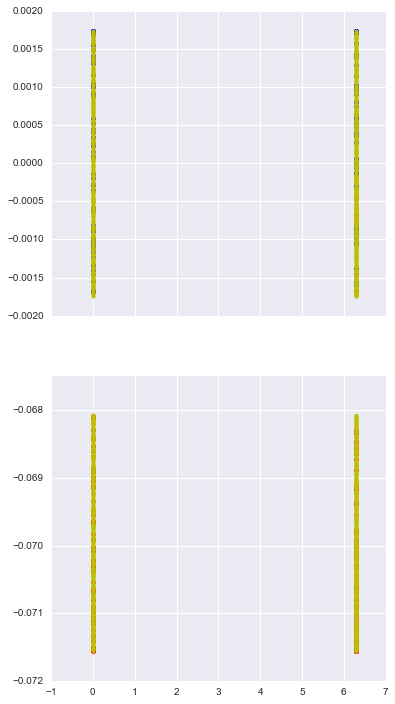

In [18]:
fig, ax = plt.subplots(2, 1, figsize=(6, 12), sharex=True)
ax[0].plot(merged.raJ2000, merged.decJ2000, 'y.')
ax[0].scatter(uncommon.raJ2000, uncommon.decJ2000, color='b')

ax[1].plot(merged.raJ2000_1, merged.decJ2000_1, 'y.')
ax[1].scatter(uncommon.raJ2000_1, uncommon.decJ2000_1, color='r')




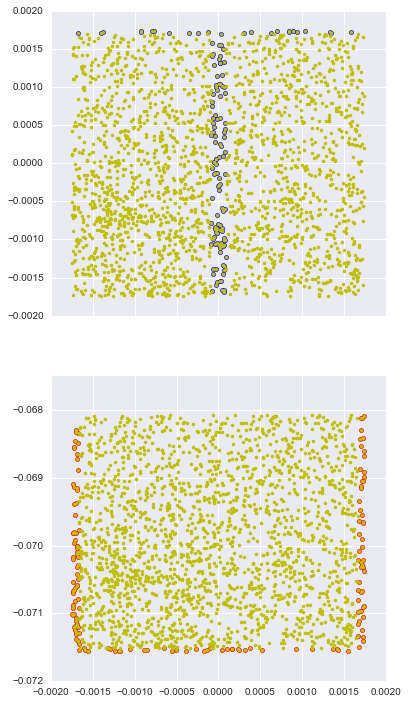

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(6, 12), sharex=True)
ax[0].plot(merged.shiftedRA, merged.decJ2000, 'y.')
ax[0].scatter(uncommon.shiftedRA, uncommon.decJ2000, color='b')

ax[1].plot(merged.shiftedRA_1, merged.decJ2000_1, 'y.')
ax[1].scatter(uncommon.shiftedRA_1, uncommon.decJ2000_1, color='r')



In [20]:
print(len(uncommon)/2., (len(gBase_df) + len(gTile1_df) )/2.)

143.0 2228.0


In [21]:
np.sqrt(2228.)

47.201694884823787

In [22]:
len(merged[merged.shiftedRA_1.isnull()])

134

In [23]:
len(merged[merged.shiftedRA.isnull()])

152

In [24]:
len(merged)

2371

## Tests Galaxies are correctly identified

In [25]:
common = merged[~merged.isnull().any(axis=1)]

In [26]:
np.allclose(common.redshift, common.redshift_1)

True

In [27]:
np.allclose(common.mass_stellar, common.mass_stellar_1)

True

In [28]:
np.allclose(common.absmag_r_total, common.absmag_r_total_1)

True

In [29]:
print(len(common))

2085


## Angular Separations

In [30]:
common.head()

,raJ2000,decJ2000,redshift,mass_stellar,absmag_r_total,raJ2000_1,decJ2000_1,redshift_1,mass_stellar_1,absmag_r_total_1,shiftedRA,shiftedRA_1
id,,,,,,,,,,,,
157,0.000261,0.000750,0.2212,0.009765,-16.19086,0.000179,-0.069021,0.2212,0.009765,-16.19086,0.000261,0.000179
3439,0.000843,0.000985,0.1980,5.389866,-22.81107,0.000762,-0.068788,0.1980,5.389866,-22.81107,0.000843,0.000762
5199,0.000280,0.001694,0.3295,9.559460,-22.63002,0.000200,-0.068077,0.3295,9.559460,-22.63002,0.000280,0.000200
7260,0.000818,-0.000958,0.2405,2.654986,-22.37807,0.000733,-0.070730,0.2405,2.654986,-22.37807,0.000818,0.000733
7552,0.001381,-0.000987,0.2408,3.249657,-21.89512,0.001297,-0.070761,0.2408,3.249657,-21.89512,0.001381,0.001297


In [31]:
NSelect = 1000
sel = np.random.choice(common.index.values, NSelect*2, replace=False)

In [32]:
split_1 = common.ix[sel[:NSelect]]
split_2 = common.ix[sel[NSelect:]]

In [33]:
print(len(split_1), len(split_2))

1000 1000


In [34]:
split_1

,raJ2000,decJ2000,redshift,mass_stellar,absmag_r_total,raJ2000_1,decJ2000_1,redshift_1,mass_stellar_1,absmag_r_total_1,shiftedRA,shiftedRA_1
id,,,,,,,,,,,,
400512835707,6.282947,-0.000898,0.1790,0.000455,-12.63770,6.283034,-0.070669,0.1790,0.000455,-12.63770,-0.000238,-0.000151
400506299579,6.282140,0.001157,0.3594,0.003746,-15.61224,6.282219,-0.068616,0.3594,0.003746,-15.61224,-0.001045,-0.000966
8824459,0.001501,-0.001141,0.3291,0.006535,-14.93010,0.001417,-0.070915,0.3291,0.006535,-14.93010,0.001501,0.001417
865832,0.001318,0.000185,0.2332,0.032716,-17.07724,0.001237,-0.069589,0.2332,0.032716,-17.07724,0.001318,0.001237
400501229233,6.282431,-0.001557,0.3592,0.008838,-17.64829,6.282518,-0.071330,0.3592,0.008838,-17.64829,-0.000754,-0.000667
610138,0.000435,-0.000160,0.2182,0.064077,-17.51929,0.000351,-0.069932,0.2182,0.064077,-17.51929,0.000435,0.000351
400501786182,6.282115,0.000318,0.1898,0.001309,-15.72784,6.282197,-0.069455,0.1898,0.001309,-15.72784,-0.001070,-0.000988
400505526955,6.282235,-0.001650,0.2930,0.006457,-15.30489,6.282322,-0.071423,0.2930,0.006457,-15.30489,-0.000950,-0.000863
1260758,0.000404,0.000086,0.3173,0.022277,-17.24217,0.000320,-0.069686,0.3173,0.022277,-17.24217,0.000404,0.000320


In [35]:
from lsst.sims.utils import haversine

In [36]:
df = pd.DataFrame({'ids_1': split_1.index.values,
                   'ids_2': split_2.index.values,
                   'raJ2000': split_1.raJ2000.values,
                   'shiftedRA':split_1.shiftedRA.values,
                   'decJ2000':split_1.decJ2000.values,
                   'raJ2000_2': split_2.raJ2000.values,
                   'shiftedRA_2': split_2.shiftedRA_1.values,
                   'decJ2000_2':split_2.decJ2000.values,
                   'angsep': haversine(split_1.decJ2000.values, split_1.raJ2000.values, split_2.decJ2000.values, 
                                       split_2.raJ2000.values),
                  'angsep_1': haversine(split_1.decJ2000_1.values, split_1.raJ2000_1.values, split_2.decJ2000_1.values, 
                                       split_2.raJ2000_1.values)}
                   #'angsep_1': haversine(split_1.decJ2000_1, split_1.raJ2000_1, split_2.decJ2000_1, split_2.raJ2000_1)}
                  )

In [37]:
df['ratio'] = df.angsep_1/df.angsep 

In [38]:
df.ratio.describe()

count    1000.000000
mean        0.967984
std         0.041734
min         0.725755
25%         0.942582
50%         0.999408
75%         1.000442
max         1.010106
Name: ratio, dtype: float64

In [39]:
df.ratio.isnull().any()

False

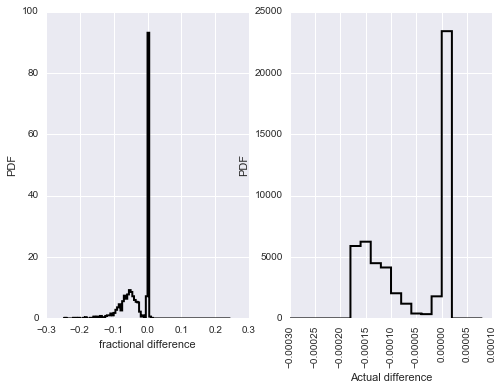

In [40]:
fig, ax = plt.subplots(1, 2)
_ = ax[0].hist(df.ratio.values - 1., bins=np.arange(-0.25, 0.25, 0.005),normed=1,
        histtype='step', alpha=1, lw=2., color='k')
# sns.kdeplot(df.ratio - 1., ax=ax)
ax[0].set_xlabel('fractional difference')
ax[0].set_ylabel('PDF')
_ = ax[1].hist((df.ratio.values - 1.)*df.angsep,normed=1, bins=np.arange(-0.0003, 0.0001, 0.00002),
        histtype='step', alpha=1, lw=2., color='k')
xticks = ax[1].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]


# sns.kdeplot(df.ratio - 1., ax=ax)
ax[1].set_xlabel('Actual difference')
ax[1].set_ylabel('PDF')

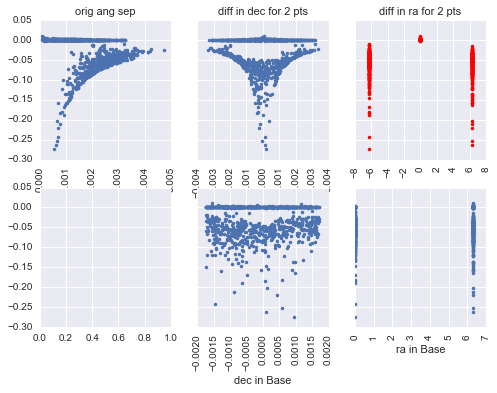

In [41]:
# Use if not using base tile
fig, ax = plt.subplots(2, 3, sharey=True, squeeze=False)
ax[0,0].plot(df.angsep, df.ratio-1, '.')
xticks = ax[0, 0].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[0, 0].set_xlabel('orig ang sep')
ax[0, 0].xaxis.set_label_position('top') 
ax[0, 1].plot(df.decJ2000 - df.decJ2000_2, df.ratio - 1, '.')
ax[0, 1].set_xlabel('diff in dec for 2 pts')
ax[0, 1].xaxis.set_label_position('top') 
xticks = ax[0, 1].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[0, 2].plot(df.raJ2000 - df.raJ2000_2, df.ratio - 1, '.r')
xticks = ax[0, 2].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[0, 2].set_xlabel('diff in ra for 2 pts')
ax[0, 2].xaxis.set_label_position('top') 


ax[1, 1].plot(df.decJ2000, df.ratio - 1, '.')
xticks = ax[1, 1].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[1, 1].set_xlabel('dec in Base')
ax[1, 2].plot(df.raJ2000, df.ratio - 1, '.')
xticks = ax[1, 2].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[1, 2].set_xlabel('ra in Base')


#ax[1,0].plot(df.angsep, (df.ratio -1)* df.angsep, '.')

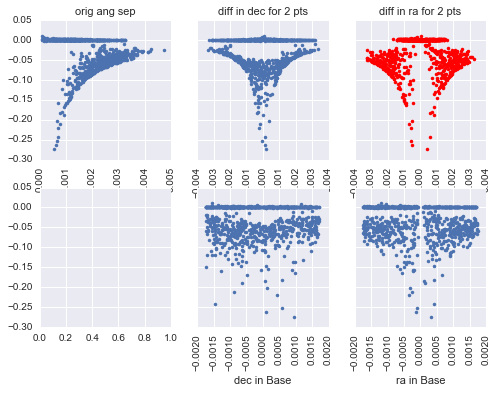

In [42]:
# Use shifts to take care of periodicity of ra newar ra=0.
fig, ax = plt.subplots(2, 3, sharey=True, squeeze=False)
ax[0,0].plot(df.angsep, df.ratio-1, '.')
xticks = ax[0, 0].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[0, 0].set_xlabel('orig ang sep')
ax[0, 0].xaxis.set_label_position('top') 
ax[0, 1].plot(df.decJ2000 - df.decJ2000_2, df.ratio - 1, '.')
ax[0, 1].set_xlabel('diff in dec for 2 pts')
ax[0, 1].xaxis.set_label_position('top') 
xticks = ax[0, 1].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[0, 2].plot(df.shiftedRA - df.shiftedRA_2, df.ratio - 1, '.r')
xticks = ax[0, 2].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[0, 2].set_xlabel('diff in ra for 2 pts')
ax[0, 2].xaxis.set_label_position('top') 


ax[1, 1].plot(df.decJ2000, df.ratio - 1, '.')
xticks = ax[1, 1].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[1, 1].set_xlabel('dec in Base')
ax[1, 2].plot(df.shiftedRA, df.ratio - 1, '.')
xticks = ax[1, 2].get_xticklabels()
_ = [xtick.set_rotation(90.) for xtick in xticks]
ax[1, 2].set_xlabel('ra in Base')


#ax[1,0].plot(df.angsep, (df.ratio -1)* df.angsep, '.')

In [43]:
print(len(df))

1000


In [44]:
print(len(merged))

2371


## Scratch

In [45]:
df.raJ2000.max()

6.2831010000000003

In [46]:
df.raJ2000.min()

8.7372489999999997e-05

In [47]:
gTile1_df.raJ2000_1.min()

4.9064210000000001e-06

In [48]:
gTile1_df.raJ2000_1.max()

6.2831849999999996

In [49]:
gBase_df.raJ2000.min()

2.492506e-06

In [50]:
np.degrees(gBase_df.raJ2000.max())

359.99992510412659